In [31]:
import ipykernel

# Importing Required Packages

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset 

In [94]:
df=pd.read_csv(r"C:\Users\CVR\Desktop\6784\inventory_data_noisy.csv")

In [95]:
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles


In [96]:
df.shape

(18360, 6)

# Handling missing values

In [97]:
df.isnull().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity        92
Consumption     92
Location       184
dtype: int64

# Handling Numerical values by taking the mean 

In [98]:
df['Quantity'].mean()

np.float64(59.10570396321437)

In [99]:
med=df['Quantity'].median()
med

np.float64(54.0)

In [100]:
df['Consumption'].mean()

np.float64(12.938526384935406)

In [101]:
med2=df['Consumption'].median()
med2

np.float64(12.0)

In [102]:
df['Quantity']=df['Quantity'].fillna(med)

In [103]:
df.isnull().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity         0
Consumption     92
Location       184
dtype: int64

In [104]:
df['Consumption']=df['Consumption'].fillna(med2)

In [105]:
df.isnull().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity         0
Consumption      0
Location       184
dtype: int64

# Handling missing values in  Categorical values(Most frequent value)

In [106]:
m=df['Location'].mode()
m

0    New York
Name: Location, dtype: object

In [107]:
df.isnull().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity         0
Consumption      0
Location       184
dtype: int64

#  Checking for duplicated values and handling them.

In [108]:
df.duplicated().sum()

np.int64(349)

##  Drop the duplicated values

In [109]:
df=df.drop_duplicates()

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18011 entries, 0 to 18343
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dealer_ID    18011 non-null  object 
 1   Product_ID   18011 non-null  object 
 2   Date         18011 non-null  object 
 3   Quantity     18011 non-null  float64
 4   Consumption  18011 non-null  float64
 5   Location     17827 non-null  object 
dtypes: float64(2), object(4)
memory usage: 985.0+ KB


## Checking for unique values 

In [111]:
df.nunique()

Dealer_ID      10
Product_ID     20
Date           90
Quantity       91
Consumption    16
Location        3
dtype: int64

In [112]:
df.describe()

,Quantity,Consumption
count,18011.000000,18011.000000
mean,59.205652,12.947643
std,71.491021,13.394529
min,10.000000,5.000000
25%,32.000000,8.000000
50%,54.000000,12.000000
75%,77.000000,16.000000
max,990.000000,190.000000


##  Checking for outliers

Text(0.5, 1.0, 'Distribution of Consumption')

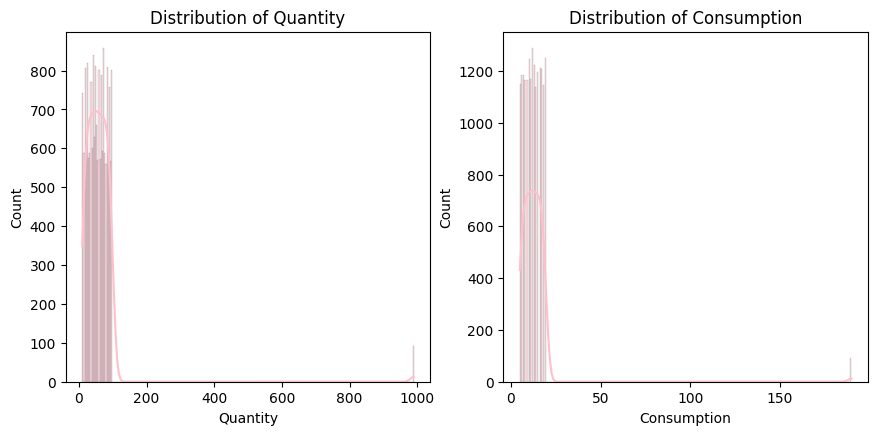

In [113]:
df_eda = df

# Setting up the plotting area
plt.figure(figsize=(16, 10))


## Distribution of numerical columns
plt.subplot(2, 3, 1)
sns.histplot(df_eda['Quantity'], kde=True, color='pink')
plt.title('Distribution of Quantity')

plt.subplot(2, 3, 2)
sns.histplot(df_eda['Consumption'], kde=True, color='pink')
plt.title('Distribution of Consumption')

Text(0.5, 1.0, 'Boxplot of Consumption')

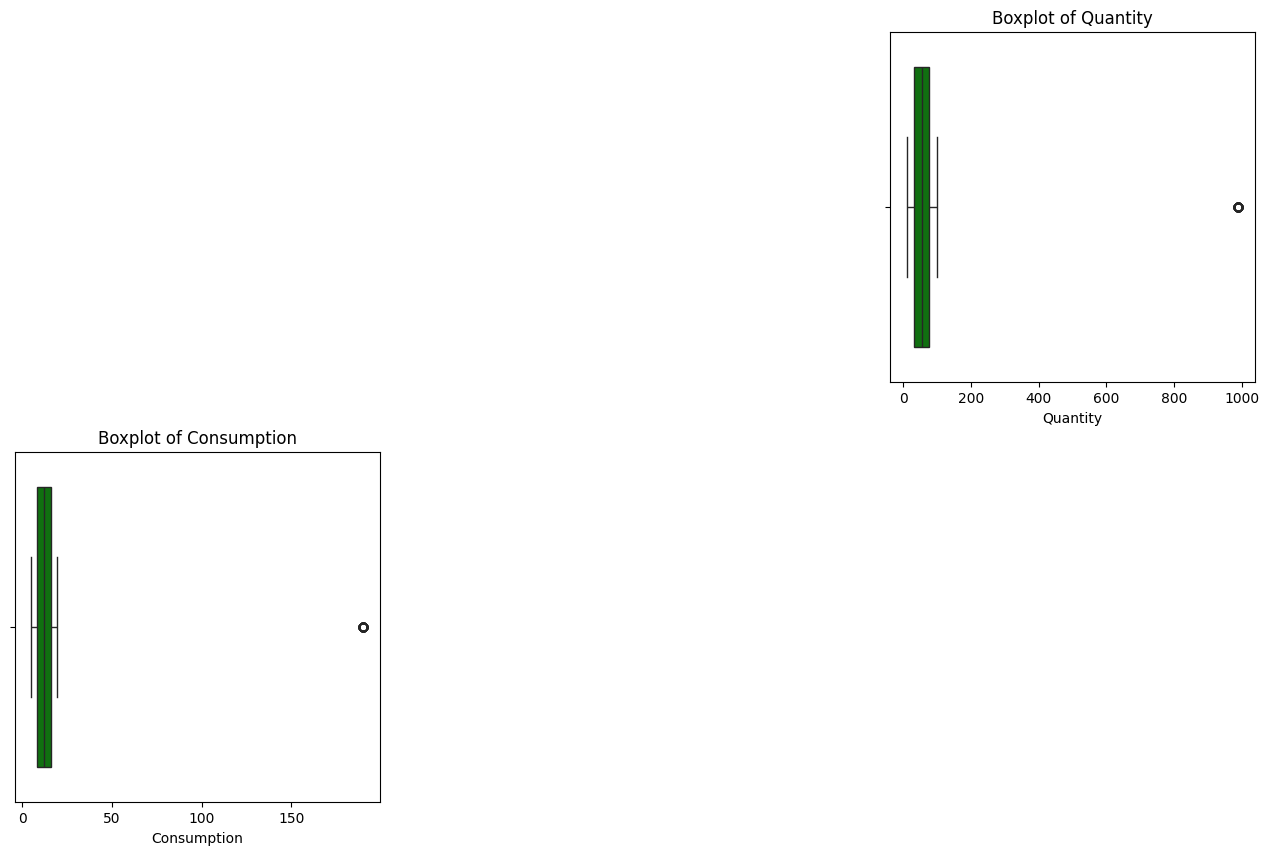

In [114]:
plt.figure(figsize=(16, 10))
## Boxplots to visualize outliers
plt.subplot(2, 3, 3)
sns.boxplot(data=df_eda, x='Quantity', color='green')
plt.title('Boxplot of Quantity')

plt.subplot(2, 3, 4)
sns.boxplot(data=df_eda, x='Consumption', color='green')
plt.title('Boxplot of Consumption')

##  Handling ouliers using IQR(Inter Quartile Range)

In [115]:
def remove_outliers(df,columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-1.5*IQR
        upper_bound=Q1+1.5*IQR
        df=df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
outlier_columns=["Quantity","Consumption"]
df=remove_outliers(df,outlier_columns)

## Checking if the outliers are removed successfully using histogram and boxplot

Text(0.5, 1.0, 'Distribution of Consumption')

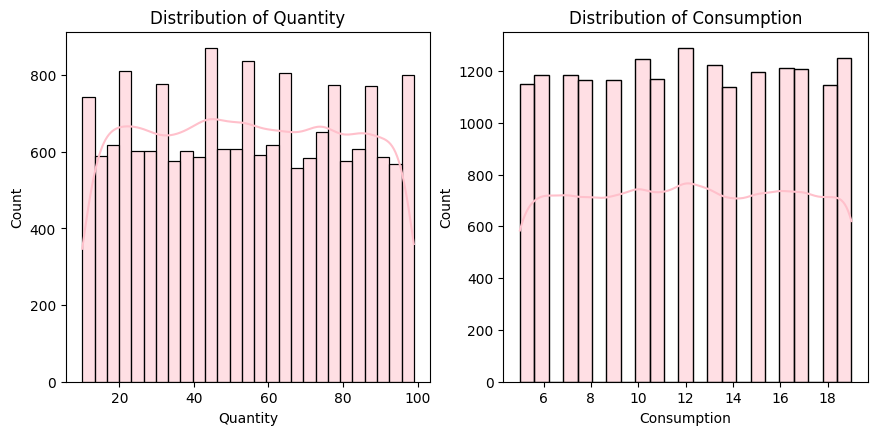

In [116]:
df_eda = df

# Setting up the plotting area
plt.figure(figsize=(16, 10))


## Distribution of numerical columns
plt.subplot(2, 3, 1)
sns.histplot(df_eda['Quantity'], kde=True, color='pink')
plt.title('Distribution of Quantity')

plt.subplot(2, 3, 2)
sns.histplot(df_eda['Consumption'], kde=True, color='pink')
plt.title('Distribution of Consumption')

Text(0.5, 1.0, 'Boxplot of Consumption')

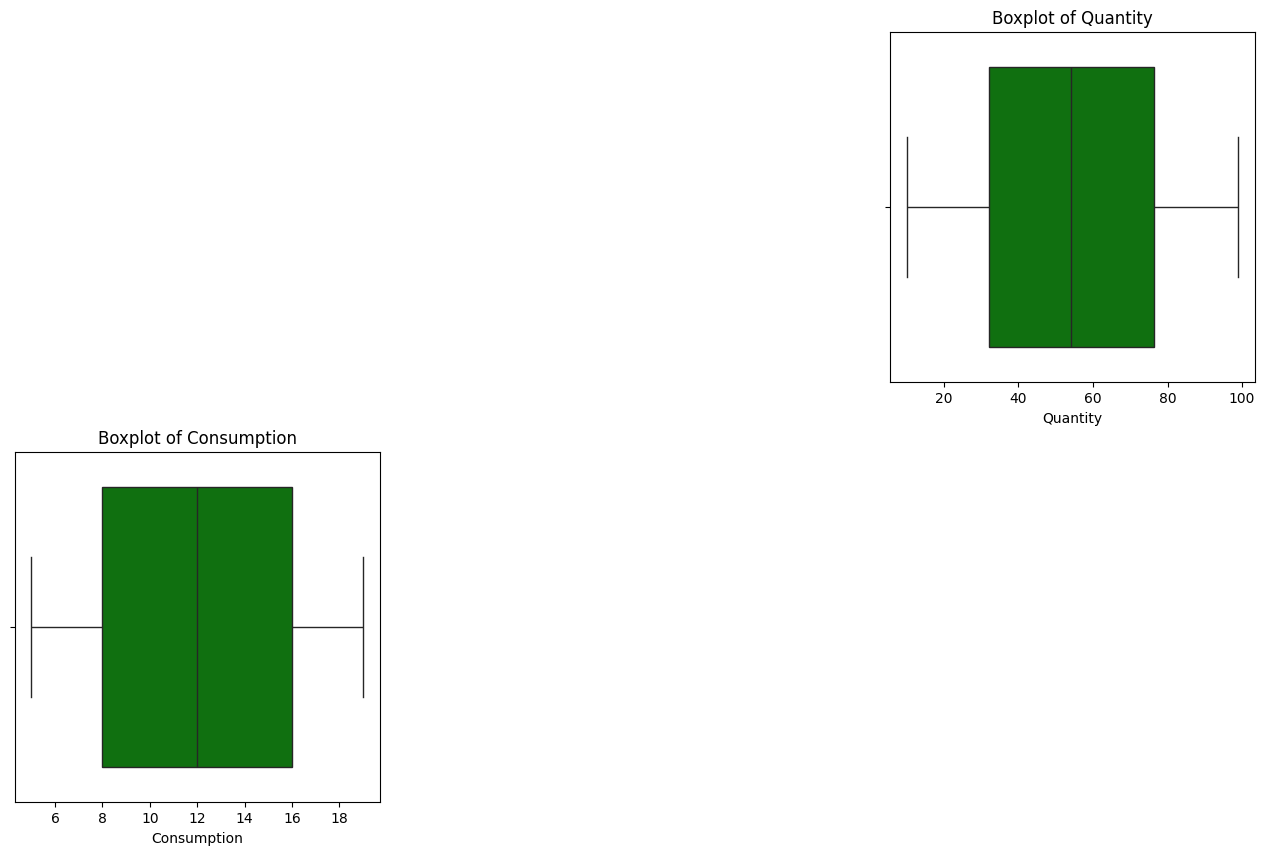

In [117]:
plt.figure(figsize=(16, 10))
## Boxplots to visualize outliers
plt.subplot(2, 3, 3)
sns.boxplot(data=df_eda, x='Quantity', color='green')
plt.title('Boxplot of Quantity')

plt.subplot(2, 3, 4)
sns.boxplot(data=df_eda, x='Consumption', color='green')
plt.title('Boxplot of Consumption')

## Categorical values present in the dataset

In [118]:
print("Categories in 'Dealer_ID' variable: ",end=" " )
print(df['Dealer_ID'].unique())

print("Categories in 'Product_ID' variable: ",end=" ")
print(df['Product_ID'].unique())

print("Categories in'Location' variable: ",end=" " )
print(df['Location'].unique())


Categories in 'Dealer_ID' variable:  ['D000' 'D001' 'D002' 'D003' 'D004' 'D005' 'D006' 'D007' 'D008' 'D009']
Categories in 'Product_ID' variable:  ['P000' 'P001' 'P002' 'P003' 'P004' 'P005' 'P006' 'P007' 'P008' 'P009'
 'P010' 'P011' 'P012' 'P013' 'P014' 'P015' 'P016' 'P017' 'P018' 'P019']
Categories in'Location' variable:  ['Chicago' 'Los Angeles' 'New York' nan]


## Defining Numerical and categorical values

In [119]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 2 numerical features : ['Quantity', 'Consumption']

We have 4 categorical features : ['Dealer_ID', 'Product_ID', 'Date', 'Location']


## Adding Consumption level column and Quantity consumption ratios

In [120]:
## Adding column requirement based on Quantity and Consumption
low_threshold = df["Consumption"].quantile(0.33)
high_threshold = df["Consumption"].quantile(0.66)

In [121]:
# Create a new categorical target column
def categorize_consumption(value):
    if value <= low_threshold:
        return "Low"
    elif value <= high_threshold:
        return "Medium"
    else:
        return "High"

df["Consumption_Level"] = df["Consumption"].apply(categorize_consumption)

df['Quantity_consumption_ratios'] = df['Quantity']/df['Consumption']

In [122]:
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,Consumption_Level,Quantity_consumption_ratios
0,D000,P000,2022-01-01,62.0,8.0,Chicago,Low,7.750000
1,D000,P000,2022-01-02,70.0,9.0,Chicago,Low,7.777778
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles,High,0.705882
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles,Medium,5.692308
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles,Low,5.700000


# Exploring the project
## Visualize Quantity and consumption distribution to make some conclusion.
--> Histogram and Kernel Density Estimate(KDE)

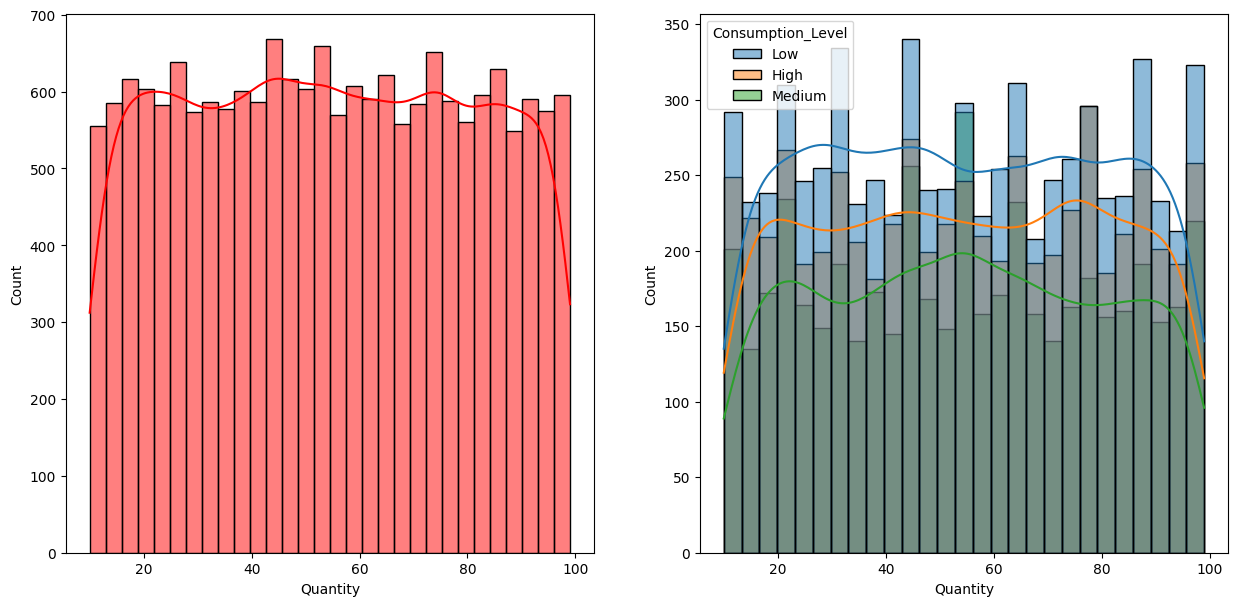

In [123]:
## Histogram & KDE
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Quantity',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='Quantity',kde=True,hue='Consumption_Level')
plt.show()

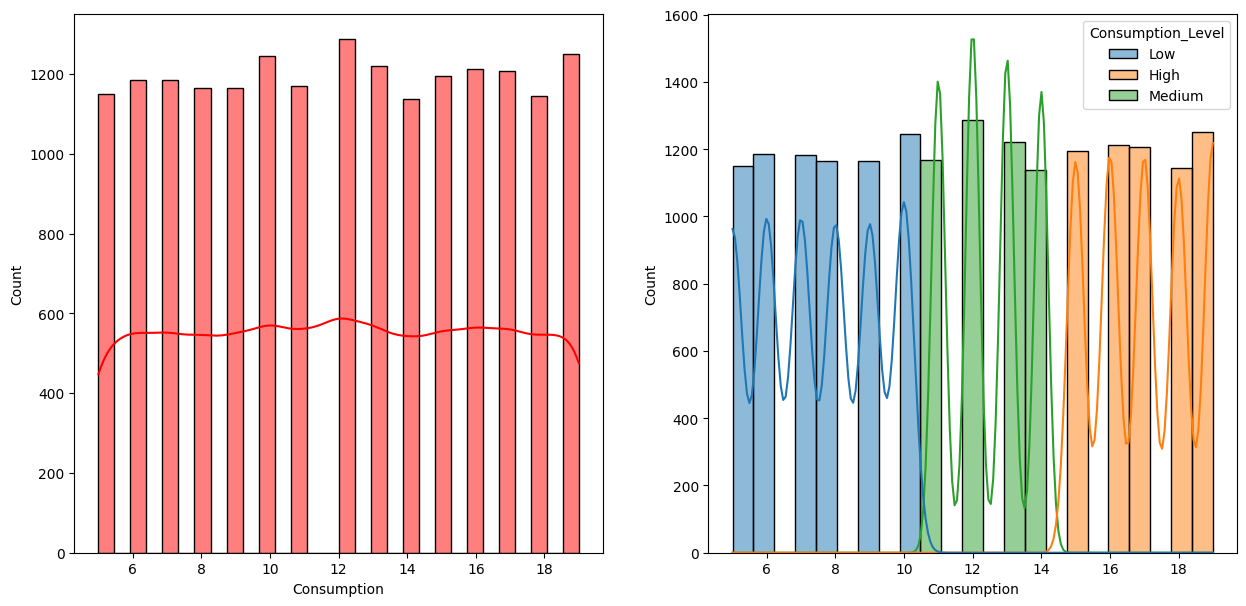

In [124]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Consumption',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='Consumption',kde=True,hue='Consumption_Level')
plt.show()

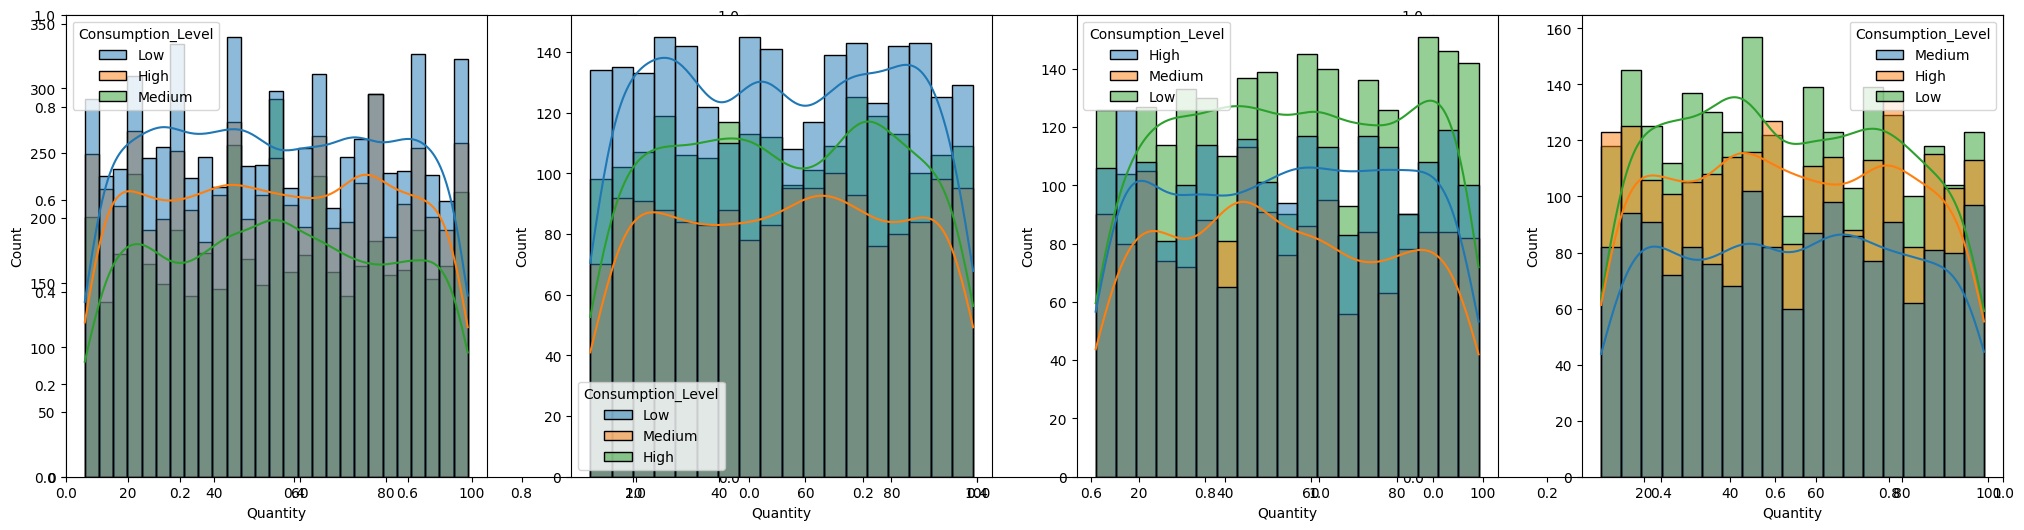

In [125]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(142)
sns.histplot(data=df[df.Location=='Chicago'],x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(143)
sns.histplot(data=df[df.Location=='Los Angeles'],x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(144)
sns.histplot(data=df[df.Location=='New York'],x='Quantity',kde=True,hue='Consumption_Level')

plt.show()

## Multivariate Analysis

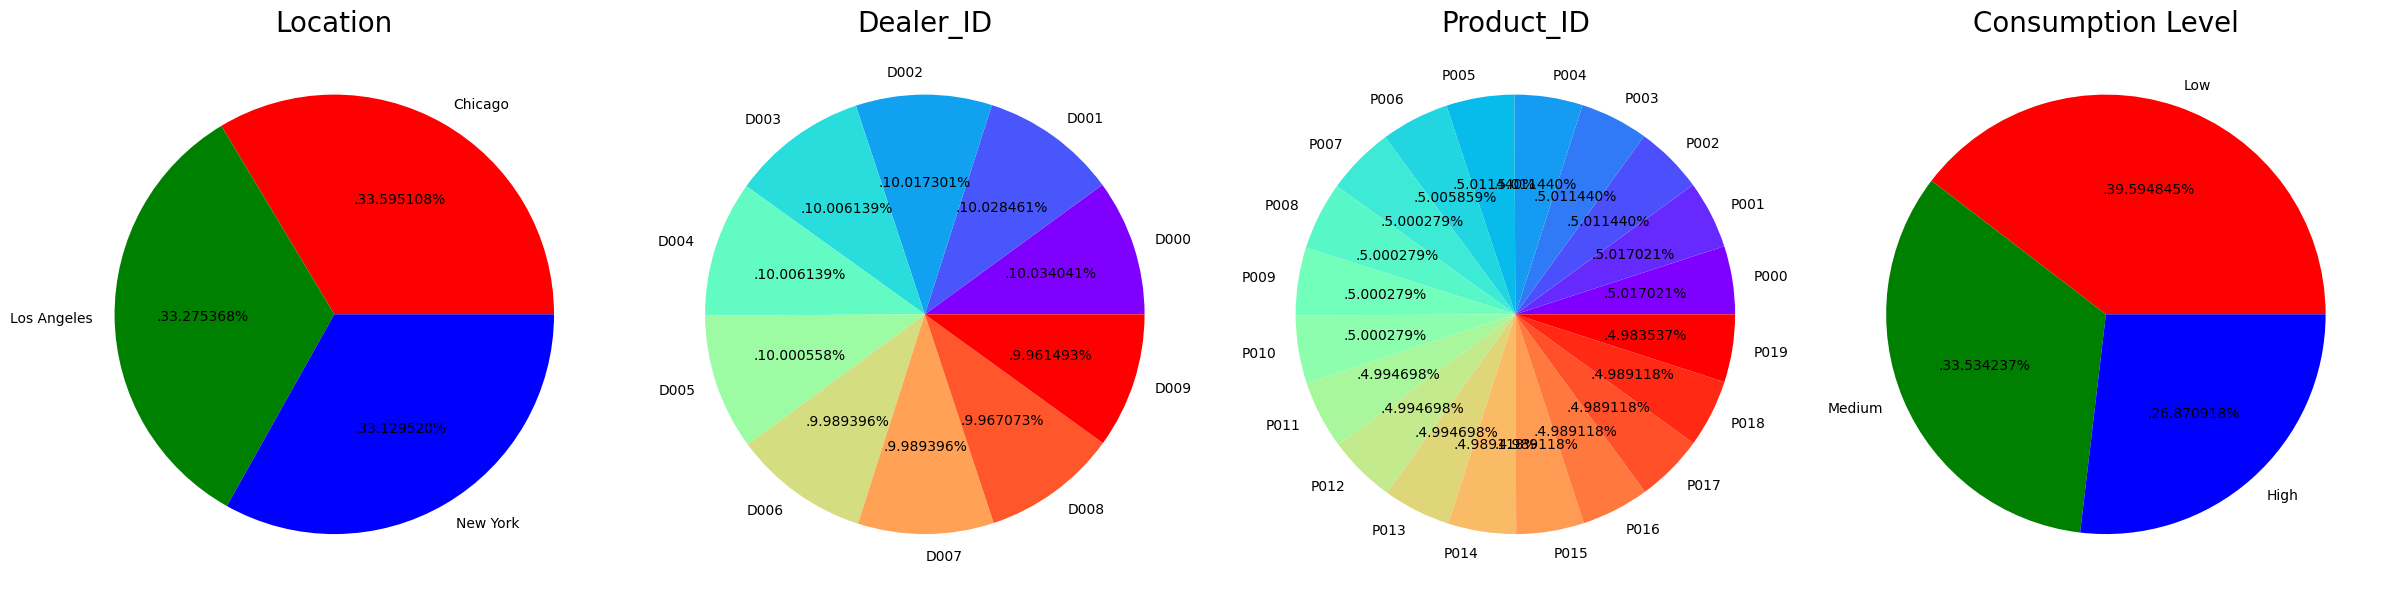

In [128]:
## Multivariate analysis using pieplot

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['Location'].value_counts()
labels = 'Chicago', 'Los Angeles','New York'
color = ['red','green','blue']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Location', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['Dealer_ID'].value_counts()
labels = 'D000', 'D001','D002','D003','D004','D005','D006','D007','D008','D009'
color = plt.cm.rainbow(np.linspace(0, 1, len(labels)))

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Dealer_ID', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['Product_ID'].value_counts()
labels = 'P000', 'P001', 'P002', 'P003', 'P004', 'P005', 'P006', 'P007', 'P008', 'P009', 'P010', 'P011', 'P012', 'P013', 'P014', 'P015', 'P016', 'P017', 'P018', 'P019'
color = plt.cm.rainbow(np.linspace(0, 1, len(labels)))

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Product_ID', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['Consumption_Level'].value_counts()
labels = 'Low', 'Medium','High'
color = ['red','green','blue']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Consumption Level', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

## Univariate Analysis on Location Column

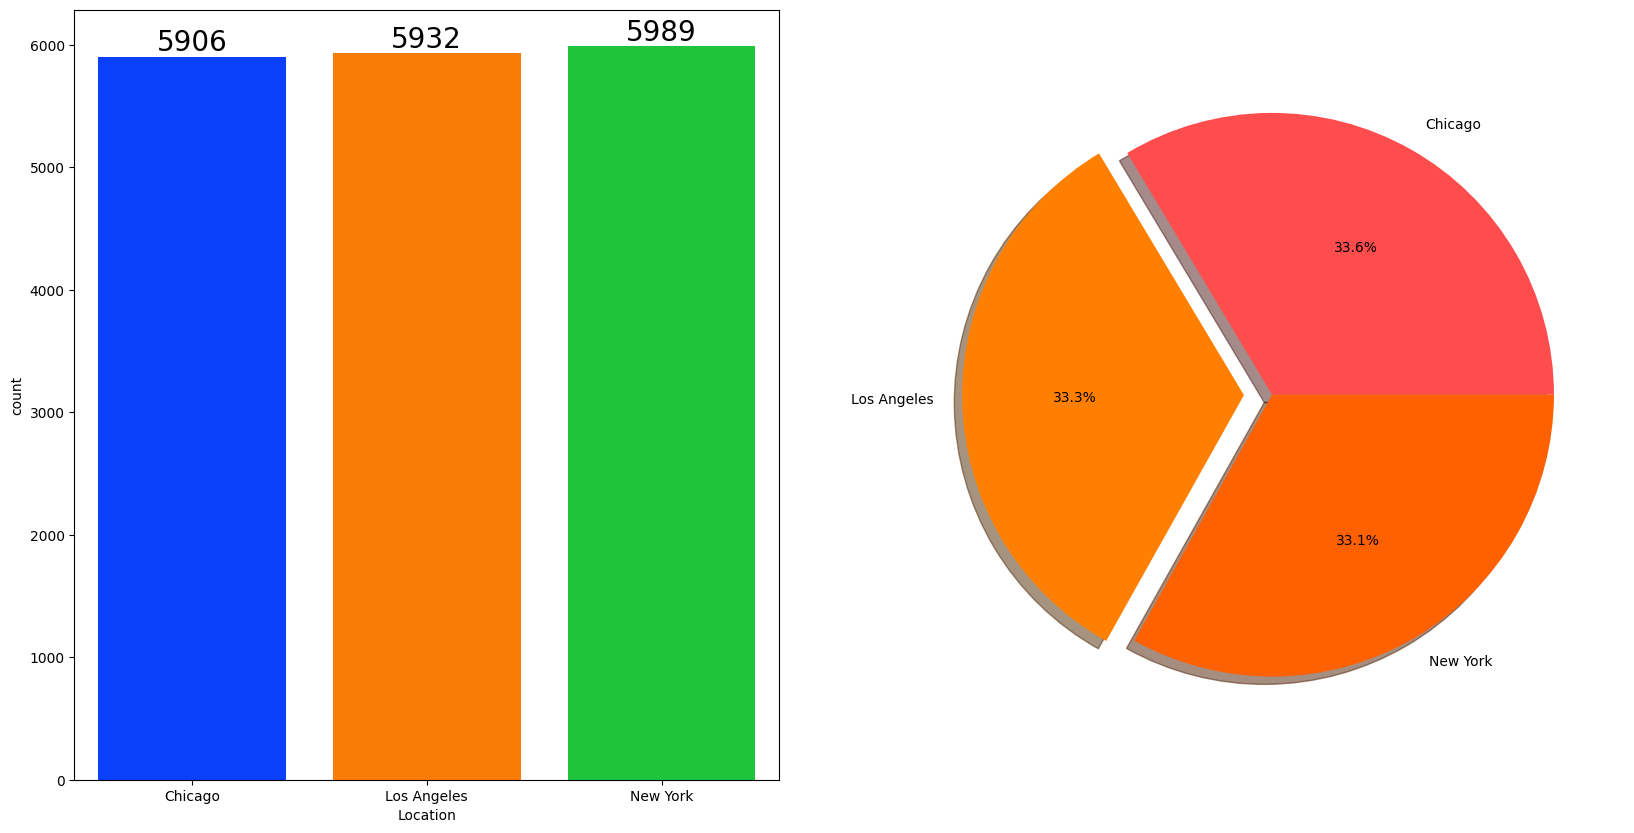

In [129]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Location'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Location'].value_counts(),labels=['Chicago','Los Angeles','New York'],explode=[0,0.1,0],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000','#ff6000'])
plt.show()

## Bivariate Analysis ( Is Location has any impact on Consumption ? )

In [130]:
location_group = df.groupby('Location')
location_group

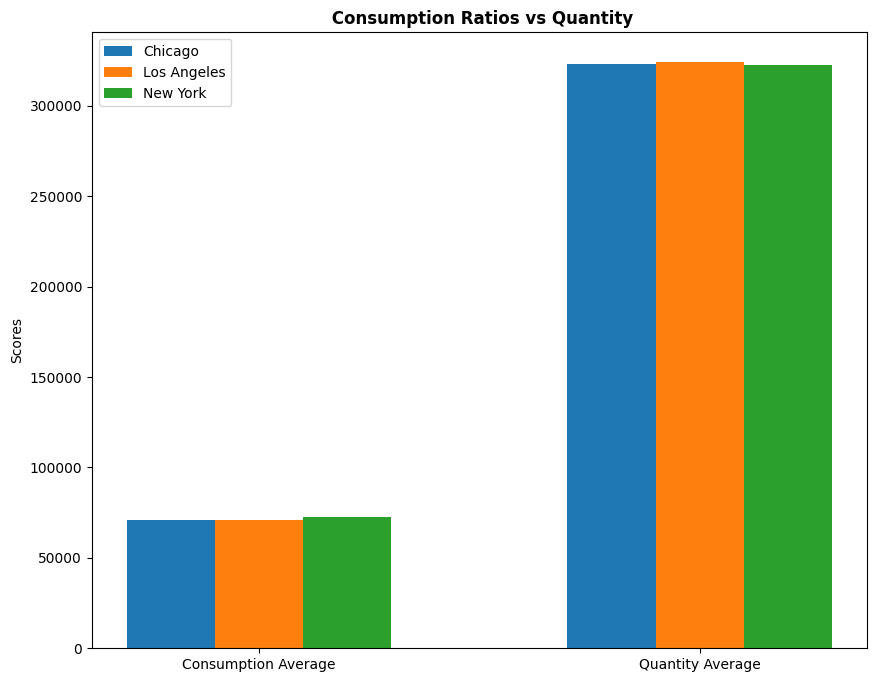

In [131]:
import numpy as np
import matplotlib.pyplot as plt

# Grouping by 'Location' and aggregating using the sum of the relevant columns
location_group = df.groupby('Location').sum()
# Extracting the required data from the aggregated DataFrame
chicago_scores = [
    location_group.loc['Chicago', 'Consumption'], 
    location_group.loc['Chicago', 'Quantity']
]
losangeles_scores = [
    location_group.loc['Los Angeles', 'Consumption'], 
    location_group.loc['Los Angeles', 'Quantity']
]
newyork_scores = [
    location_group.loc['New York', 'Consumption'], 
    location_group.loc['New York', 'Quantity']
]

# Plot
plt.figure(figsize=(10, 8))

X = ['Consumption Average', 'Quantity Average']
X_axis = np.arange(len(X))

# Plot the bars with proper offsets for each city
plt.bar(X_axis - 0.2, chicago_scores, 0.2, label='Chicago')
plt.bar(X_axis, losangeles_scores, 0.2, label='Los Angeles')
plt.bar(X_axis + 0.2, newyork_scores, 0.2, label='New York')

# Set the x-axis labels and the chart's title
plt.xticks(X_axis, X)
plt.ylabel("Scores")
plt.title(" Consumption Ratios vs Quantity", fontweight='bold')

# Show legend and plot
plt.legend()
plt.show()


## Univariate Analysis for dealers

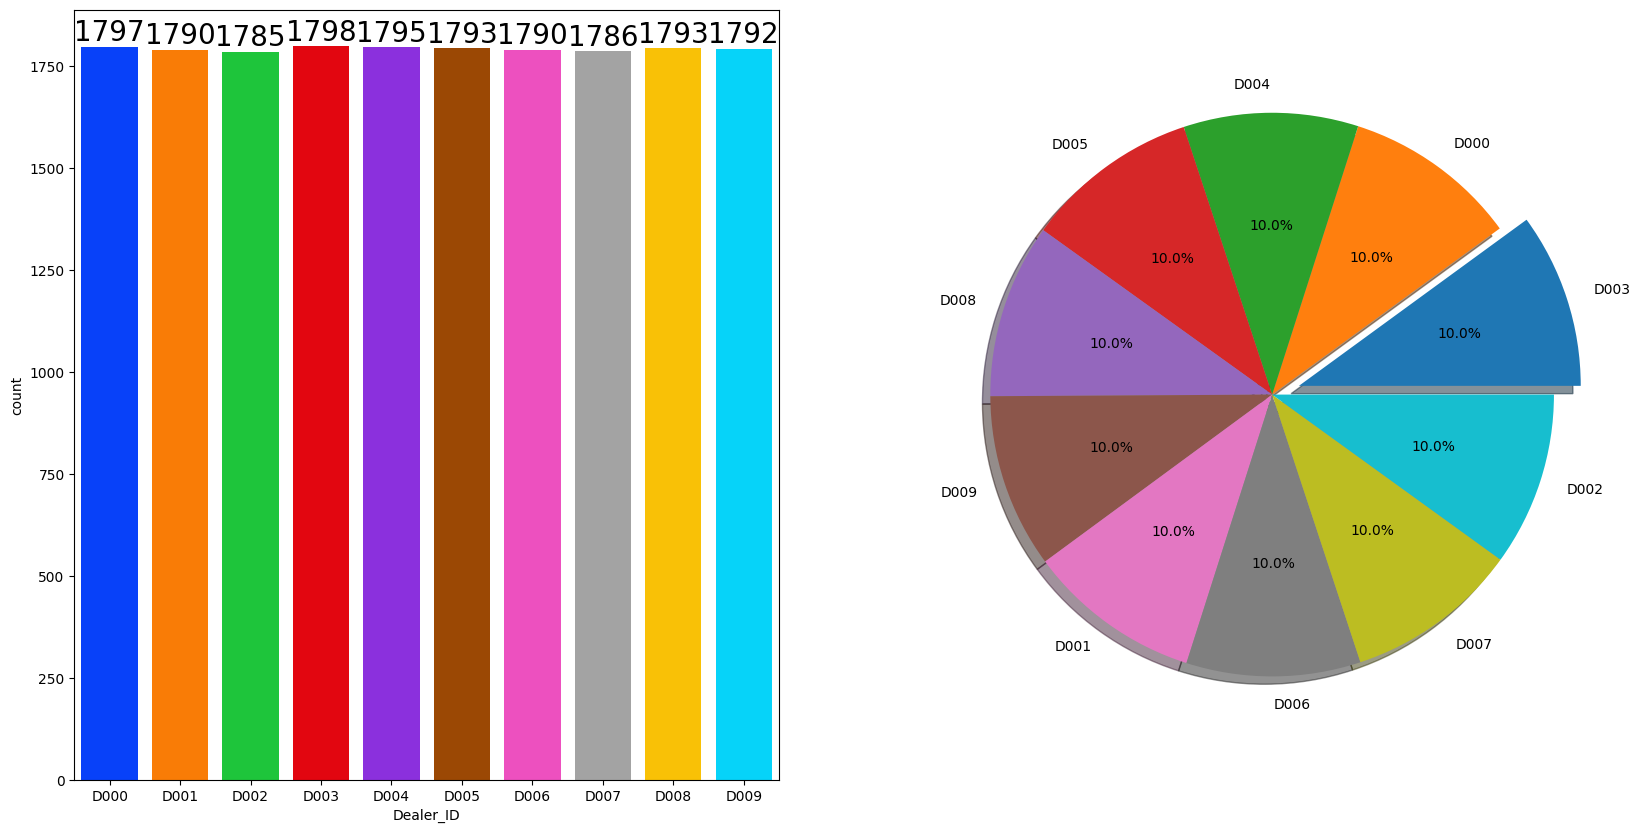

In [132]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Dealer_ID'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['Dealer_ID'].value_counts(),labels=df['Dealer_ID'].value_counts().index,explode=[0.1,0,0,0,0,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

## Bivariate Analysis ( Is Dealer  has any impact on consumption ? )

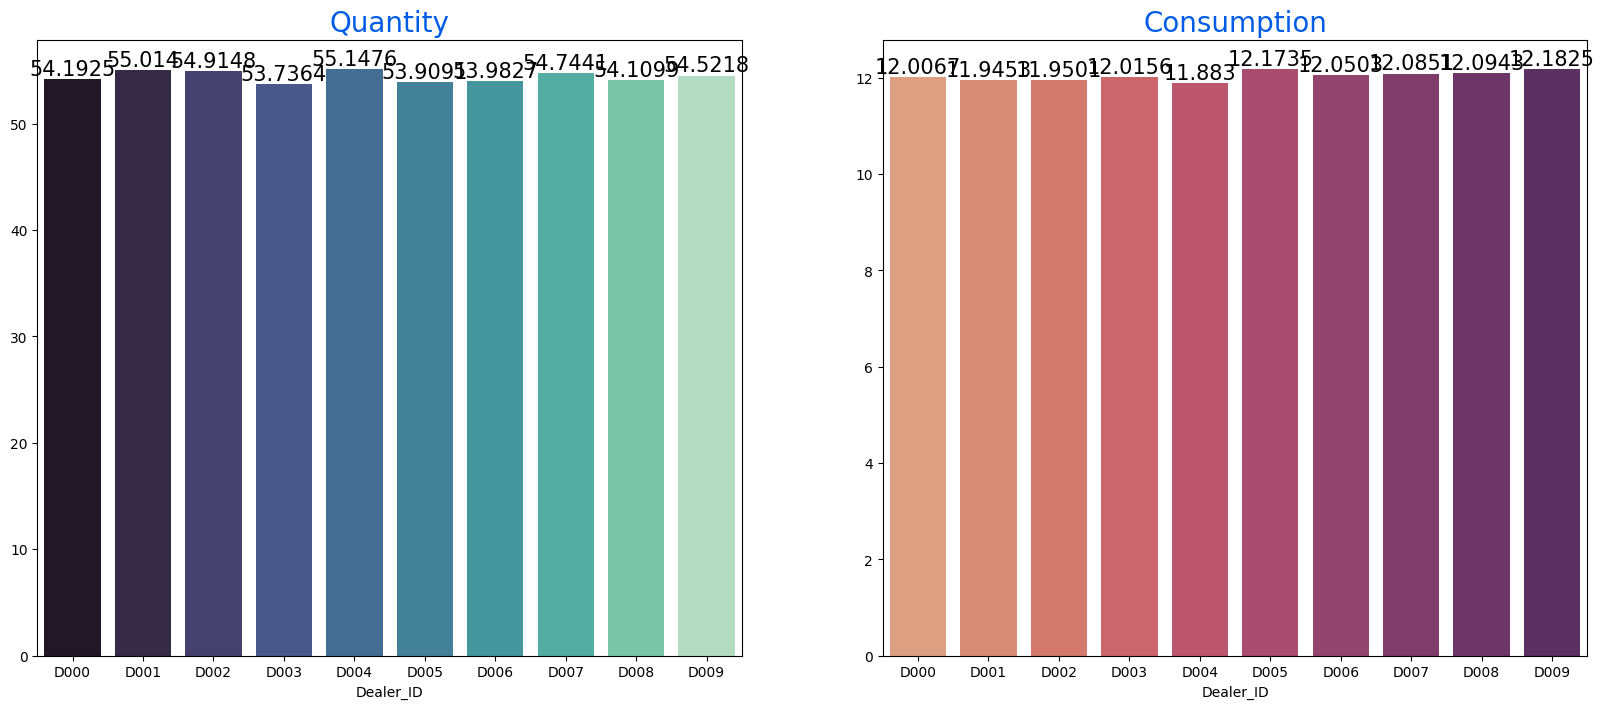

In [133]:
Group_data2=df.groupby('Dealer_ID')
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x=Group_data2['Quantity'].mean().index,y=Group_data2['Quantity'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Quantity',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['Consumption'].mean().index,y=Group_data2['Consumption'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Consumption',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)


### Univariate Analysis ( What is the most product most used? )

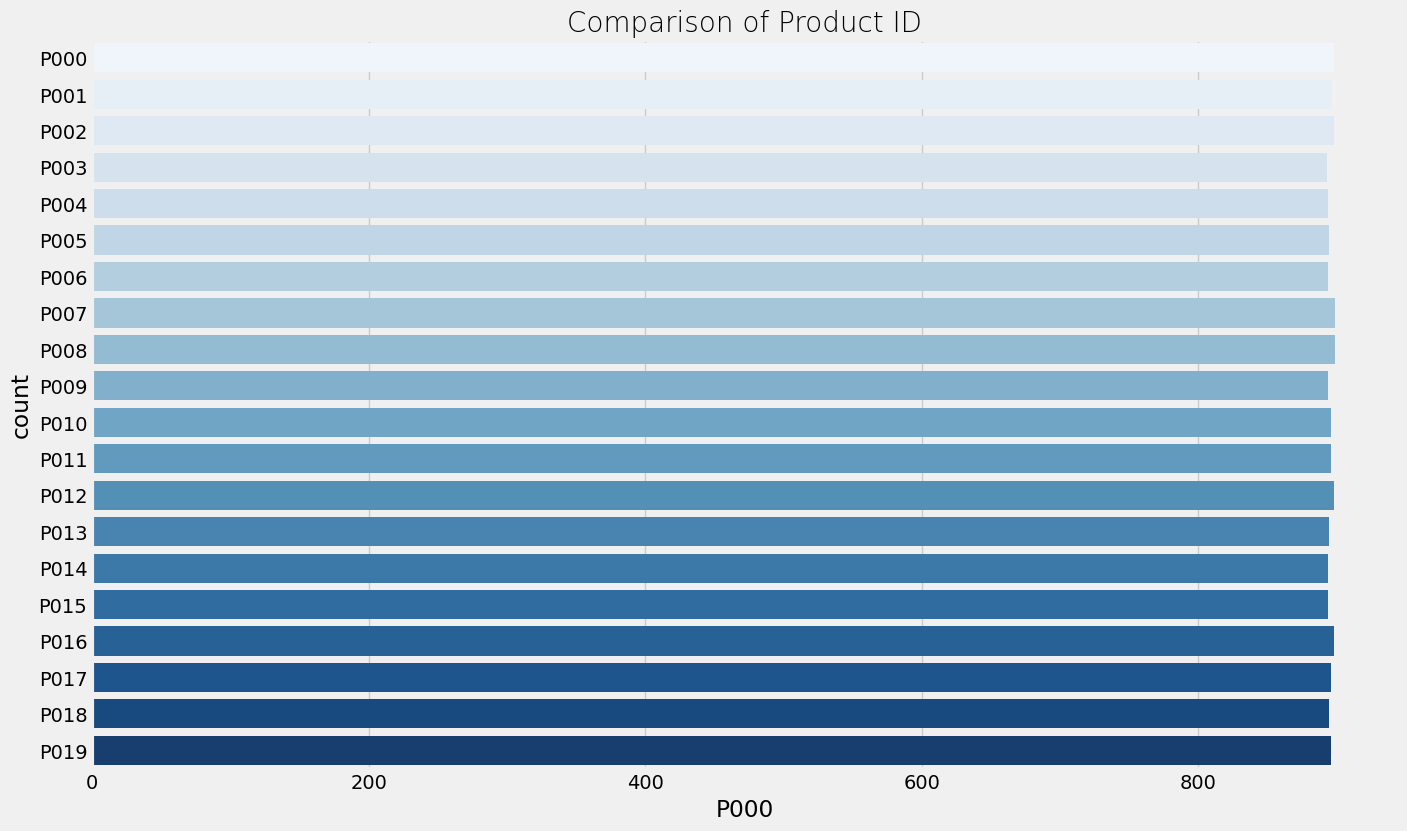

In [134]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['Product_ID'], palette = 'Blues')
plt.title('Comparison of Product ID', fontweight = 30, fontsize = 20)
plt.xlabel('P000')
plt.ylabel('count')
plt.show()

## Bivariate Analysis ( Is product id  has any impact on consumption ? )

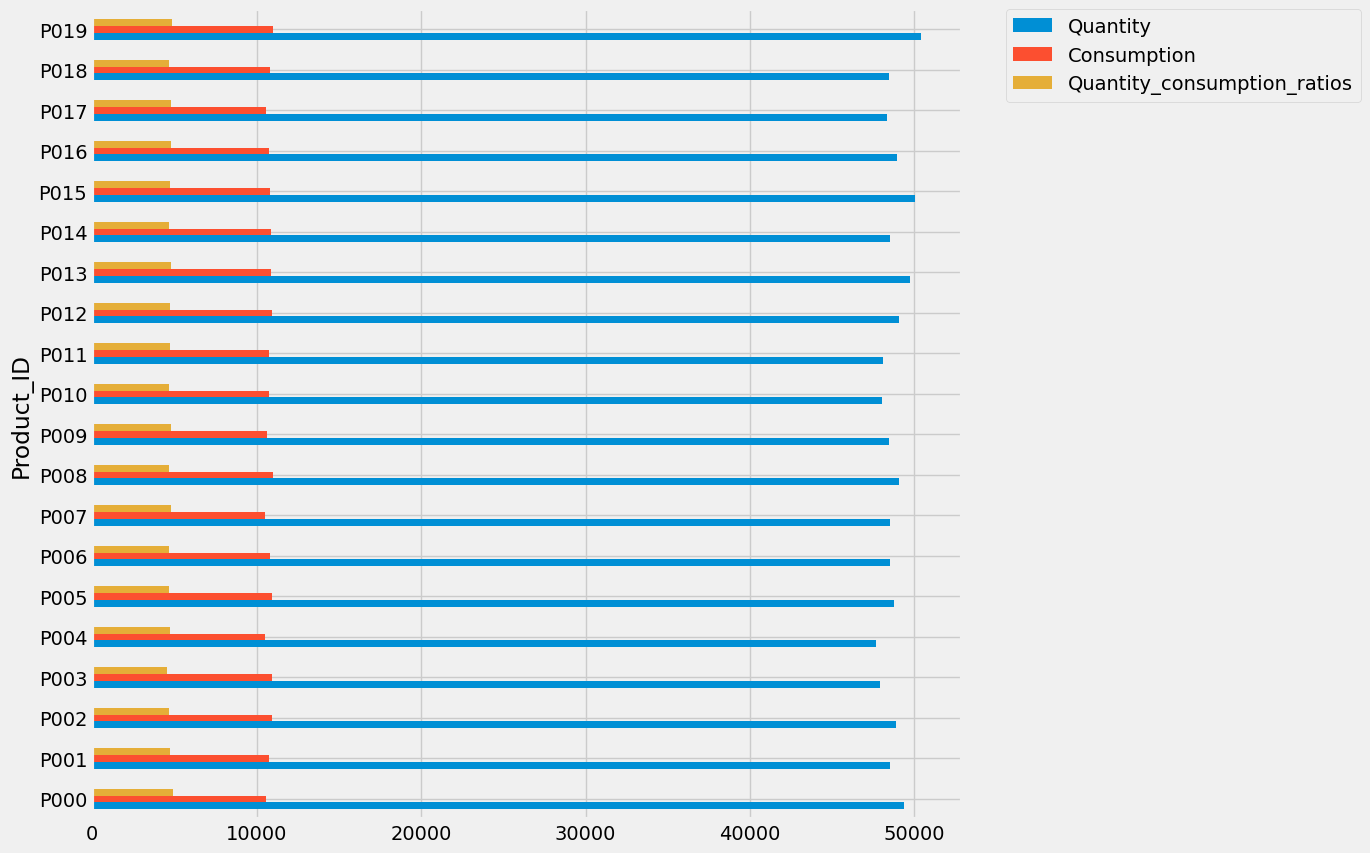

In [135]:
df.groupby('Product_ID').agg('sum').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Steps before model selection

1. Encoding for Categorical values
2. Standard scaling for numerical values 

In [136]:
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,Consumption_Level,Quantity_consumption_ratios
0,D000,P000,2022-01-01,62.0,8.0,Chicago,Low,7.750000
1,D000,P000,2022-01-02,70.0,9.0,Chicago,Low,7.777778
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles,High,0.705882
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles,Medium,5.692308
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles,Low,5.700000


In [141]:
pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------- -------------------------------- 2.1/11.1 MB 11.8 MB/s eta 0:00:01
   ----------- ---------------------------- 3.1/11.1 MB 7.4 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.1 MB 6.7 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.1 MB 6.2 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.1 MB 5.9 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/11.1 MB 5.7 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.1 MB 5.5 MB/s eta 0:00:01
   -------------------------------- ------- 9.2/11.1 MB 5.4 MB/s eta 0:00:01
   ----------------------------------- ---- 10.0/11.1 MB 5.3 MB/s eta 0:00:01
   -------------------------------------- - 10.7/11.1 MB 5.1 MB/s eta 0:00:01
   ----------------------

In [144]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import joblib

# Initialize label encoder
label_encoder = LabelEncoder()

# Perform label encoding for categorical columns
df['Dealer_ID'] = label_encoder.fit_transform(df['Dealer_ID'])
df['Product_ID'] = label_encoder.fit_transform(df['Product_ID'])
df['Location'] = label_encoder.fit_transform(df['Location'])
df['Consumption_Level'] = label_encoder.fit_transform(df['Consumption_Level'])

# Initialize standard scaler
scaler = StandardScaler()

# Scale the 'Quantity' and 'Consumption' columns
df['Quantity'] = scaler.fit_transform(df[['Quantity']])  # Use double brackets to pass as DataFrame
df['Consumption'] = scaler.fit_transform(df[['Consumption']])

# Drop 'Date' column if it exists
if 'Date' in df.columns:
    df = df.drop('Date', axis=1)

# Define features and target variable
X = df.drop(['Consumption_Level', 'Quantity_consumption_ratios'], axis=1)
y = df['Consumption_Level']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

# Initialize logistic regression model
clf = LogisticRegression(max_iter=10000, random_state=0)
clf.fit(X_train, y_train)

# Save the trained model
joblib.dump(clf, 'logistic_regression_model.pkl')

# Evaluate the model accuracy
acc = accuracy_score(y_test, clf.predict(X_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

# Predictions
y_pred = clf.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Score (Only for binary classification)
if len(set(y)) == 2:  # Check if binary classification
    auc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    print(f"\nROC-AUC Score: {auc_score:.2f}")


Logistic Regression model accuracy: 100.00%
Confusion Matrix:
 [[1221    0    0]
 [   0 1342    0]
 [   0    0 1021]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1221
           1       1.00      1.00      1.00      1342
           2       1.00      1.00      1.00      1021

    accuracy                           1.00      3584
   macro avg       1.00      1.00      1.00      3584
weighted avg       1.00      1.00      1.00      3584



In [145]:
import joblib

# Save the trained LabelEncoder
joblib.dump(label_encoder, "label_encoder.pkl")

# Save the trained StandardScaler
joblib.dump(scaler, "scaler.pkl")

# Save the trained Logistic Regression model
joblib.dump(clf, "logistic_model.pkl")

# Save the feature names used during training
joblib.dump(X_train.columns.tolist(), "X_train_columns.pkl")

print("All objects saved successfully!")

All objects saved successfully!


In [146]:
# New sample data (replace with actual values)
new_data = pd.DataFrame({
    'Dealer_ID': ['D003'],
    'Product_ID': ['P010'],
     'Quantity': [50],
    'Consumption': [9], 
    'Location': ['Chicago']
   
})

# Apply Label Encoding (using trained encoder)
for col in ['Dealer_ID', 'Product_ID', 'Location']:
    if new_data[col][0] in label_encoder.classes_:
        new_data[col] = label_encoder.fit_transform(new_data[col])
    else:
        new_data[col] = -1  # Handle unseen labels

# Apply Scaling (using trained scaler)
new_data['Quantity'] = scaler.fit_transform(new_data[['Quantity']])  # Use double brackets to pass as DataFrame
new_data['Consumption'] = scaler.fit_transform(new_data[['Consumption']])

X# Reorder columns in X_new to match X_train
X_new = new_data[X_train.columns]  # This ensures the order matches

# Convert to NumPy array before scaling (prevents feature mismatch errors)
# Convert back to DataFrame with correct column names
X_new_scaled = pd.DataFrame(X_new, columns=X_train.columns)

# Predict Consumption Level
predicted_class = clf.predict(X_new_scaled)
predicted_proba = clf.predict_proba(X_new_scaled)

print(f"Predicted Consumption Level: {predicted_class[0]}")
print(f"Prediction Probabilities: {predicted_proba}")


Predicted Consumption Level: 2
Prediction Probabilities: [[9.50200133e-06 7.33452564e-04 9.99257045e-01]]
